# Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [77]:
df = pd.read_csv('loan_customer.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [79]:
df.drop('has_credit_card', axis=1, inplace=True)

#kolom 'has_credit_card' dihapus karena memiliki data kosong yang banyak
#inplace=True merubah dataframe lama menjadi dataframe yang benar
#sesuai dengan keinginan kita

In [80]:
df.shape

(621, 16)

In [81]:
#clean empty data (NaN/NaT/etc)

df.dropna(inplace=True)

In [82]:
df.shape

(434, 16)

# Data Cleansing

## Handling missing values

In [83]:
#checking the dataframe is null
# isna is an aka for isnull

df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [85]:
df.duplicated().sum()

5

In [86]:
# Remove duplicated data

print('Entries data duplicated:')
print(df.duplicated().sum())


Entries data duplicated:
5


In [87]:
print('Entries data duplicated after remove:')
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

Entries data duplicated after remove:
0


No duplicates data

## Outlier Handling

In [89]:
# apakah ada data outlier yang sangat mempengaruhi data?
# bisa dicek dengan boxplot seperti berikut:

<AxesSubplot:xlabel='applicant_income'>

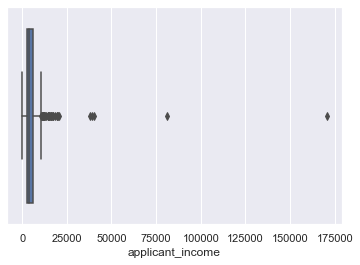

In [90]:
sns.boxplot(x='applicant_income', data=df)

<AxesSubplot:xlabel='coapplicant_income'>

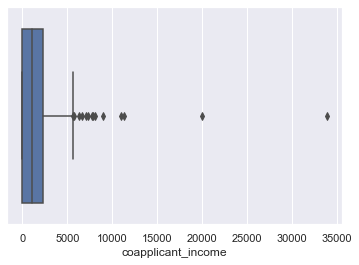

In [91]:
sns.boxplot(x='coapplicant_income', data=df)


<AxesSubplot:xlabel='loan_amount'>

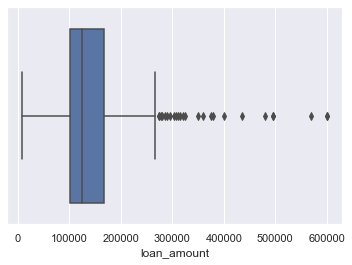

In [92]:
sns.boxplot(x='loan_amount', data=df)

In [93]:
print(f'Entries before handling outlier: {len(df)}')

for col in ['applicant_income', 'coapplicant_income', 'loan_amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Entries after handling outlier : {len(df)}')

Entries before handling outlier: 429
Entries after handling outlier : 366


In [94]:
df.shape

(366, 16)

## Feature Encoding

In [95]:
nums = ['phone_number', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']
cats = ['loan_id', 'birth_date', 'gender', 'married', 'dependents', 'education', 'self_employed', 'property_type', 'loan_status']

In [96]:
for col in cats:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column loan_id
LP001002    1
LP002337    1
LP002332    1
LP002328    1
LP002318    1
           ..
LP001693    1
LP001692    1
LP001691    1
LP001682    1
LP002984    1
Name: loan_id, Length: 366, dtype: int64
------------------------------ 

value counts of column birth_date
1990-03-25    2
1982-09-18    2
1986-05-24    2
1991-08-21    2
1984-09-29    2
             ..
1991-02-21    1
1988-11-27    1
1979-11-07    1
1985-12-30    1
1986-12-05    1
Name: birth_date, Length: 354, dtype: int64
------------------------------ 

value counts of column gender
Male      299
Female     67
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    230
No     136
Name: married, dtype: int64
------------------------------ 

value counts of column dependents
0     219
2      61
1      60
3+     26
Name: dependents, dtype: int64
------------------------------ 

value counts of column education
Graduate        273
Not Graduate     93
Name: educa

Strategi Encoding

*   Label Encoding: `gender`, `dependents`,`education`, `property_type`, `loan_status`
*   One Hot Encoding: `self_employed`, `married`



In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             366 non-null    object 
 1   birth_date          366 non-null    object 
 2   phone_number        366 non-null    float64
 3   gender              366 non-null    object 
 4   married             366 non-null    object 
 5   dependents          366 non-null    object 
 6   education           366 non-null    object 
 7   self_employed       366 non-null    object 
 8   applicant_income    366 non-null    float64
 9   coapplicant_income  366 non-null    float64
 10  loan_amount         366 non-null    int64  
 11  loan_term_month     366 non-null    int64  
 12  loan_term_year      366 non-null    int64  
 13  credit_history      366 non-null    float64
 14  property_type       366 non-null    object 
 15  loan_status         366 non-null    object 
dtypes: float

In [98]:
# Label encoding

mapping_gender = {
    'Male'      : 0,
    'Female'    : 1
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+': 3
}

mapping_education = {
    'Graduate'      : 0,
    'Not Graduate'  : 1
}

mapping_property_type = {
    'apartment'     : 0,
    'house'         : 1,
    'studio'        : 2
}

mapping_loan_status = {
    'REJECT'        : 0,
    'APPROVE'       : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['dependents'] = df['dependents'].map(mapping_dependents)
df['education'] = df['education'].map(mapping_education)
df['property_type'] = df['property_type'].map(mapping_property_type)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [99]:
# One hot encoding

for cats in ['self_employed', 'married']:
    onehot = pd.get_dummies(df[cats], prefix=cats)
    df = df.join(onehot)

In [100]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,self_employed_No,self_employed_Yes,married_No,married_Yes
0,LP001002,1977-05-15,6.281142e+11,0,No,0,0,No,5849.0,0.0,100000,360,30,1.0,1,1,1,0,1,0
1,LP001003,1979-08-24,6.287764e+11,0,Yes,1,0,No,4583.0,1508.0,128000,360,30,1.0,2,0,1,0,0,1
2,LP001005,1991-03-28,6.281192e+11,0,Yes,0,0,Yes,3000.0,0.0,66000,360,30,1.0,1,1,0,1,0,1
3,LP001006,1980-06-02,6.285634e+10,0,Yes,0,1,No,2583.0,2358.0,120000,360,30,1.0,1,1,1,0,0,1
4,LP001008,1989-05-19,6.281130e+11,0,No,0,0,No,6000.0,0.0,141000,360,30,1.0,1,1,1,0,1,0


In [101]:
# dataframe after process
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 619
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             366 non-null    object 
 1   birth_date          366 non-null    object 
 2   phone_number        366 non-null    float64
 3   gender              366 non-null    int64  
 4   married             366 non-null    object 
 5   dependents          366 non-null    int64  
 6   education           366 non-null    int64  
 7   self_employed       366 non-null    object 
 8   applicant_income    366 non-null    float64
 9   coapplicant_income  366 non-null    float64
 10  loan_amount         366 non-null    int64  
 11  loan_term_month     366 non-null    int64  
 12  loan_term_year      366 non-null    int64  
 13  credit_history      366 non-null    float64
 14  property_type       366 non-null    int64  
 15  loan_status         366 non-null    int64  
 16  self_emp

# Business Insight

## Analyze Customer Interest by Property Type

In [102]:
df_alz1= df[['gender', 'property_type']].value_counts().to_frame().reset_index()
df_alz1

,gender,property_type,0
0,0,0,114
1,0,1,98
2,0,2,87
3,1,0,34
4,1,2,17
5,1,1,16


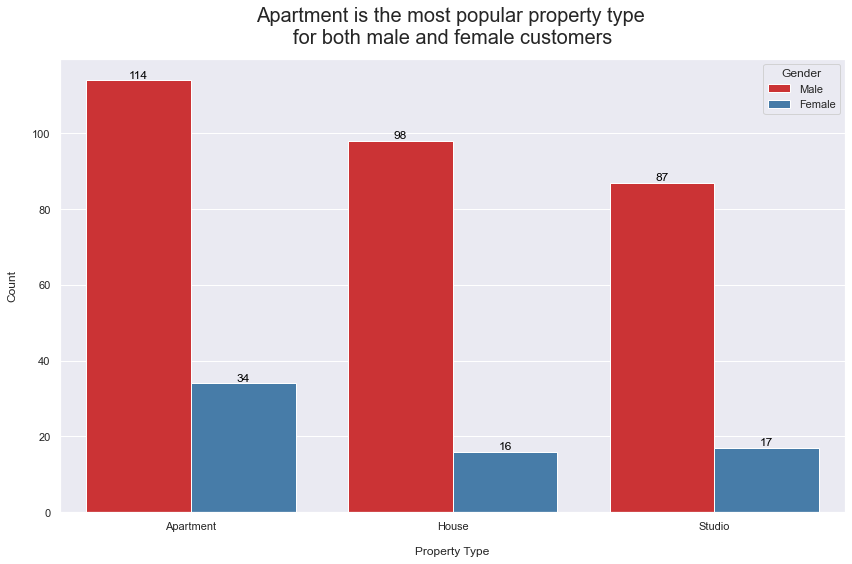

In [113]:
# Data Visualization

sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(x = 'property_type', data = df, hue = 'gender', palette = "Set1")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Legend
plt.legend(['Male', 'Female'], title = 'Gender')

# Change axis X label
x = [0, 1, 2]
labels = ['Apartment', 'House', 'Studio']
plt.xticks(x, labels)
    
ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type \nfor both male and female customers', pad=15, size=20)
plt.tight_layout() 
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200)




## Analyze the effect of marital status on the time loan period

In [115]:
df_alz2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_alz2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df_alz2

,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,119
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,1


The data above shows categorical differences in the length of loan data. Therefore, it's necessary to grouping to make the category length of time loan is uniform between married and unmarried customers, so that we can first see the distribution of the data.

<AxesSubplot:xlabel='loan_term_year', ylabel='Count'>

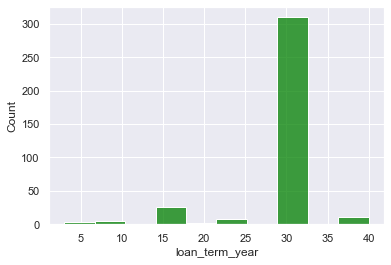

In [119]:
sns.histplot(data=df, x="loan_term_year", bins=10, color="green")

According to the graphic, data is grouped into (years): <15, 15 - 25, 30, >30

In [126]:
# made the categoryy loan_term_year
loan_term_year_group = {}
for i in range(1,41):
    if i<15:
        loan_term_year_group[i]= '<15'
    elif i>=15 and i<=25:
        loan_term_year_group[i]= '15-25'
    elif i==30:
        loan_term_year_group[i]= '30'
    elif i>30:
        loan_term_year_group[i]= '>30'
    else:
        pass
    
# made the new colomn base on group before
df_alz2['loan_term_year_group'] = df_alz2['loan_term_year'].replace(loan_term_year_group)

Text(-0.5, 205, 'Most applicants who are married or not have chosen a loan term of 30 years')

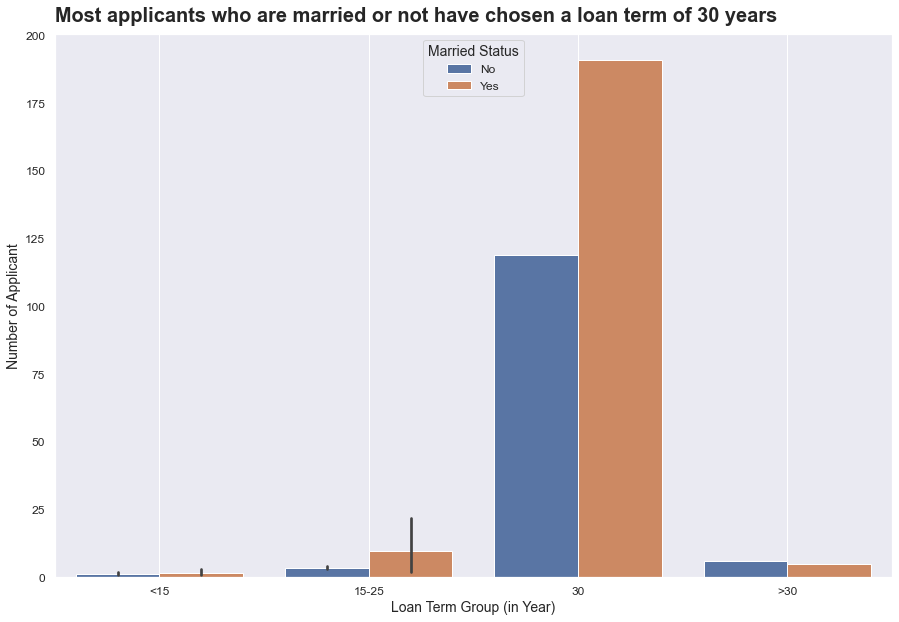

In [127]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_term_year_group', y='number_of_applicant', hue='married', data=df_alz2)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Married Status', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Loan Term Group (in Year)', fontsize=14)
plt.ylabel('Number of Applicant', fontsize=14)
plt.text(x=-0.5, y=205, s="Most applicants who are married or not have chosen a loan term of 30 years", 
         fontsize=20, fontweight='bold') 

According to the observation, all customers interested to offers for apartment. When viewed from the marital status, customers who are married or unmarried feel that the ideal loan period is 30 years. On the other hand, married customers choose a loan period of 15 - 25 years because both of them have income.

# Conclussion

The single customers who have an average loan term longer than married customers
